In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

In [3]:
df = pd.read_csv('data_5_4.csv',sep=';', encoding='cp1251', na_values=['NA', 'NULL', ' '])
# df = pd.read_csv('data.csv', sep=',', na_values=['NA', 'NULL', ' '])
df.columns = df.columns.str.lower().str.replace(' ', '_')
df = df.dropna()  # удалили строки с пропусками
df.head(1000)

,время_до,время_после,регион
0,237,240,Северо-запад
1,214,215,Северо-запад
2,202,194,Северо-запад
3,240,229,Северо-запад
4,192,187,Северо-запад
...,...,...,...
95,237,232,Центр
96,210,205,Центр
97,244,239,Центр
98,196,191,Центр


In [18]:
answ = [['регион', 'р-уровень']]
regions = list(df['регион'].unique())
df_reg = df
for i in range(len(regions)):
    answ.append([regions[i], 0])
    df_reg = df[df['регион'] == regions[i]]
    correlation, answ[i+1][1] = stats.mannwhitneyu(df_reg['время_до'], df_reg['время_после'])
    answ[i+1][1] = round(float(answ[i+1][1]), 4)
# answ = answ[1:].sort(key=lambda row: row[1])
print(answ[:1]+sorted(answ[1:], key=lambda row: row[1]))

[['регион', 'р-уровень'], ['Центр', 0.004], ['Урал', 0.0094], ['Северо-запад', 0.5067]]


In [ ]:
Задание 2

In [59]:
df = pd.read_csv('data_5_5.csv',sep=';', encoding='cp1251', na_values=['NA', 'NULL', ' '])
# df = pd.read_csv('data.csv', sep=',', na_values=['NA', 'NULL', ' '])
df.columns = df.columns.str.lower().str.replace(' ', '_')
df = df.dropna()  # удалили строки с пропусками
for i in list(df.columns)[1:]:
    df[i] = df[i].str.replace(',', '.').astype(float)
df.head()

s,_мм.кв
av,_мдж/с
x,_мм
y,_мм_
v,_мм/с


,group,"s,_мм.кв","av,_мдж/с","x,_мм","y,_мм_","v,_мм/с"
0,group_1,87.4,37.60,1.7,22.6,5.8
1,group_1,44.5,42.44,1.2,22.4,5.2
2,group_1,227.5,95.80,4.0,24.5,11.2
3,group_1,83.3,32.94,1.2,24.6,6.4
4,group_1,122.3,188.92,2.3,24.0,13.2


In [61]:
answ = [['показатель', 'р-уровень', 'метод расчёта']]
df_group1 = df[df['group'] == 'group_1']
df_group2 = df[df['group'] == 'group_2']
cl = list(df.columns)[1:]
for i in cl:
    shapiro_group1 = stats.shapiro(df_group1[i])[1]
    shapiro_group2 = stats.shapiro(df_group2[i])[1]
    if ((shapiro_group1 >= 0.05) and (shapiro_group2 >= 0.05)):
        tmp = [i, 0, 'Стьюдент']
        correlation, tmp[1] = stats.ttest_ind(df_group1[i], df_group2[i])
        tmp[1] = round(float(tmp[1]), 4)
        answ.append(tmp)
    else:
        tmp = [i, 0, 'Манн-Уитни']
        correlation, tmp[1] = stats.mannwhitneyu(df_group1[i], df_group2[i])
        tmp[1] = round(float(tmp[1]), 4)
        answ.append(tmp)
print(answ)

[['показатель', 'р-уровень', 'метод расчёта'], ['s,_мм.кв', 0.9123, 'Манн-Уитни'], ['av,_мдж/с', 0.202, 'Манн-Уитни'], ['x,_мм', 0.9927, 'Манн-Уитни'], ['y,_мм_', 0.6069, 'Манн-Уитни'], ['v,_мм/с', 0.2019, 'Манн-Уитни']]


In [ ]:
Задание 3

In [64]:
df = pd.read_csv('data_5_1.csv',sep=';', encoding='cp1251', na_values=['NA', 'NULL', ' '])
# df = pd.read_csv('data.csv', sep=',', na_values=['NA', 'NULL', ' '])
df.columns = df.columns.str.lower().str.replace(' ', '_')
df = df.dropna()  # удалили строки с пропусками
df.head(100)

,вид_зондирования,"время_зондирования,_сек",тип_осложнения_1,тип_осложнения_2,тип_осложнения_3,тип_осложнения_4
0,Классическое,69,да,да,да,да
1,Классическое,78,да,да,да,да
2,Классическое,81,да,да,да,да
3,Классическое,56,да,нет,да,да
4,Классическое,82,да,нет,нет,да
...,...,...,...,...,...,...
95,Двойное эндоскопическое сопровождение,321,нет,нет,да,нет
96,Двойное эндоскопическое сопровождение,521,да,нет,нет,нет
97,Двойное эндоскопическое сопровождение,345,нет,нет,нет,да
98,Двойное эндоскопическое сопровождение,223,нет,да,нет,нет


In [70]:
answ = [['показатель', 'р-уровень']]
df_group1 = df[df['вид_зондирования'] == 'Классическое']
df_group2 = df[df['вид_зондирования'] == 'Двойное эндоскопическое сопровождение']
cl = list(df.columns)[2:]
for i in cl:
    tmp = [i, 0]
    cross_matrix = pd.crosstab(df['вид_зондирования'], df[i])
    _, tmp[1], _, _ = stats.chi2_contingency(cross_matrix, correction=True)
    tmp[1] = round(float(tmp[1]), 5)
    answ.append(tmp)
print(answ)

[['показатель', 'р-уровень'], ['тип_осложнения_1', 0.00446], ['тип_осложнения_2', 0.49744], ['тип_осложнения_3', 1.0], ['тип_осложнения_4', 0.38862]]


In [ ]:
Задание 4

In [120]:
df = pd.read_csv('data_5_2.csv',sep=';', encoding='cp1251', na_values=['NA', 'NULL', ' '])
# df = pd.read_csv('data.csv', sep=',', na_values=['NA', 'NULL', ' '])
df = df.dropna()  # удалили строки с пропусками
df.head(1000)

,Группа,K,Ca,V,Cd,I,Pb,Q39_Corineform,Q56_Pseudonocardia,Q56_Общее_кол-во_МО,Q57_Плазмологен_мкг/мл
0,Группа_2,"37,02","2287,91","0,006","0,06","0,021","0,19",282,32,28456,"84,73"
1,Группа_2,"218,85","3187,86","0,069","0,09","0,056","0,39",367,55,31199,"4,19"
2,Группа_2,"428,57","1710,23","0,009","0,03","0,758","0,59",504,86,42251,"18,36"
3,Группа_2,"35,58","1621,3","0,005","0,02","0,1","0,11",420,56,46123,"58,54"
4,Группа_2,"67,7","2794,79","0,006","0,11","0,188","0,18",222,27,32185,"47,28"
...,...,...,...,...,...,...,...,...,...,...,...
62,Группа_1,"63,64","2224,24","0,007","0,02","1,696","0,11",215,22,28511,"38,2"
63,Группа_1,"193,85","3333,87","0,009","0,04","0,083","0,31",438,61,35184,"124,14"
64,Группа_1,"271,87","1090,53","0,05","0,05","0,502","0,21",206,41,28866,"62,3"
65,Группа_1,"45,42","2027,26","0,006","0,01","0,075","0,32",576,52,44746,"67,38"


In [121]:
cl_1 = ['K', 'Ca', 'V', 'Cd', 'I', 'Pb', 'Q57_Плазмологен_мкг/мл']
print(cl_1)
for i in cl_1:
        df[i] = df[i].str.replace(',', '.').astype(float)
df[df['Группа'] == 'Группа_1'].head()

['K', 'Ca', 'V', 'Cd', 'I', 'Pb', 'Q57_Плазмологен_мкг/мл']


,Группа,K,Ca,V,Cd,I,Pb,Q39_Corineform,Q56_Pseudonocardia,Q56_Общее_кол-во_МО,Q57_Плазмологен_мкг/мл
32,Группа_1,125.08,3041.04,0.019,0.02,0.477,0.42,189,40,31929,64.15
33,Группа_1,59.78,143.35,0.007,0.01,0.086,0.15,633,56,48592,13.40
34,Группа_1,346.69,729.01,0.019,0.02,0.086,0.17,307,90,27622,74.79
35,Группа_1,71.74,2916.81,0.084,0.04,2.890,0.15,299,56,26623,65.35
36,Группа_1,74.42,3844.09,0.012,0.02,0.286,0.49,169,35,22233,41.53


In [127]:
answ = [['показатель 1', 'показатель 2', 'значение корреляции', 'р-уровень', 'метод корреляции']]
df_group1 = df[df['Группа'] == 'Группа_1']
cl = list(df.columns)[1:]
for i in range(len(cl)):
    for j in range(i + 1, len(cl)):
        shapiro_g1_i = stats.shapiro(df_group1[cl[i]])[1]
        shapiro_g1_j = stats.shapiro(df_group1[cl[j]])[1]
        if ((shapiro_g1_i >= 0.05) and (shapiro_g1_j >= 0.05)):
            tmp = [cl[i], cl[j], 0, 0, 'Пирсон']
            tmp[2], tmp[3] = stats.pearsonr(df_group1[cl[i]], df_group1[cl[j]])
            tmp[2] = round(float(tmp[2]), 4)
            tmp[3] = round(float(tmp[3]), 4)
            answ.append(tmp)
        else:
            tmp = [cl[i], cl[j], 0, 0, 'Спирмен']
            tmp[2], tmp[3] = stats.spearmanr(df_group1[cl[i]], df_group1[cl[j]])
            tmp[2] = round(float(tmp[2]), 2)
            tmp[3] = round(float(tmp[3]), 4)
            answ.append(tmp)
print(answ[:1] + sorted(answ[1:], key=lambda row: row[2], reverse=True))

[['показатель 1', 'показатель 2', 'значение корреляции', 'р-уровень', 'метод корреляции'], ['Q39_Corineform', 'Q56_Общее_кол-во_МО', 0.73, 0.0, 'Спирмен'], ['Q56_Pseudonocardia', 'Q56_Общее_кол-во_МО', 0.61, 0.0001, 'Спирмен'], ['Q39_Corineform', 'Q56_Pseudonocardia', 0.58, 0.0002, 'Спирмен'], ['K', 'V', 0.54, 0.0008, 'Спирмен'], ['V', 'Cd', 0.48, 0.0036, 'Спирмен'], ['Q56_Pseudonocardia', 'Q57_Плазмологен_мкг/мл', 0.3725, 0.0276, 'Пирсон'], ['Ca', 'Q57_Плазмологен_мкг/мл', 0.3463, 0.0415, 'Пирсон'], ['K', 'Q56_Pseudonocardia', 0.31, 0.0721, 'Спирмен'], ['K', 'Cd', 0.29, 0.0906, 'Спирмен'], ['Pb', 'Q57_Плазмологен_мкг/мл', 0.27, 0.1196, 'Спирмен'], ['Cd', 'I', 0.26, 0.132, 'Спирмен'], ['Ca', 'Cd', 0.25, 0.1497, 'Спирмен'], ['K', 'Q57_Плазмологен_мкг/мл', 0.23, 0.1839, 'Спирмен'], ['V', 'Pb', 0.22, 0.206, 'Спирмен'], ['K', 'Pb', 0.18, 0.3063, 'Спирмен'], ['Ca', 'I', 0.18, 0.304, 'Спирмен'], ['I', 'Q57_Плазмологен_мкг/мл', 0.16, 0.3529, 'Спирмен'], ['Pb', 'Q56_Pseudonocardia', 0.16, 0.34

In [ ]:
Задание 5

In [128]:
df = pd.read_csv('data_5_4.csv',sep=';', encoding='cp1251', na_values=['NA', 'NULL', ' '])
# df = pd.read_csv('data.csv', sep=',', na_values=['NA', 'NULL', ' '])
df.columns = df.columns.str.lower().str.replace(' ', '_')
df = df.dropna()  # удалили строки с пропусками
df.head(1000)

,время_до,время_после,регион
0,237,240,Северо-запад
1,214,215,Северо-запад
2,202,194,Северо-запад
3,240,229,Северо-запад
4,192,187,Северо-запад
...,...,...,...
95,237,232,Центр
96,210,205,Центр
97,244,239,Центр
98,196,191,Центр


In [131]:
reg = input()
df_reg = df[df['регион'] == reg]
answ_1 = pd.DataFrame()
answ_1['время'] = df_reg['время_до']
answ_1['период'] = 'время_до'

answ_2 = pd.DataFrame()
answ_2['время'] = df_reg['время_после']
answ_2['период'] = 'время_после'
ans_data = pd.concat([answ_1, answ_2], axis=0)

 Северо-запад


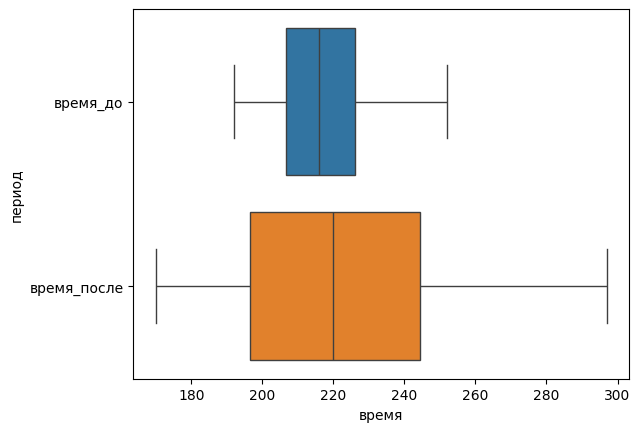

In [132]:
my_palette = ['blue', 'orange']
sns.boxplot(x='время', y='период', data=ans_data, hue='период')
plt.show()